# Julia

#### Importamos paqueterías

In [1]:
using LightGraphs

using Plots
pyplot()

using LaTeXStrings

using GraphPlot

using Colors

using DelimitedFiles

using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-13699334114722289227\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-11099714918109407907\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-13699334114722289227\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

#### Importamos el archivo con la matriz de la aerolínea AM.

In [2]:
readdlm("/Users/yuriko/Documents/UNAM/INMEGEN/Seminarios/PyLadies/AM.csv", ',')

68×68 Array{Any,2}:
 ""      "ACA"   "BJX"   "BOG"   "BRU"  …   "VER"   "VSA"   "YUL"   "VVI"
 "ACA"  0       0       0       0          0       0       0       0     
 "BJX"  0       0       0       0          0       0       0       0     
 "BOG"  0       0       0       0          0       0       0       0     
 "BRU"  0       0       0       0          0       0       0       0     
 "CCS"  0       0       0       0       …  0       0       0       0     
 "CDG"  0       0       0       0          0       0       0       0     
 "CJS"  0       0       0       0          0       0       0       0     
 "CLQ"  0       0       0       0          0       0       0       0     
 "CME"  0       0       0       0          0       0       0       0     
 "CUL"  0       0       0       0       …  0       0       0       0     
 "CUN"  0       0       0       0          0       0       0       0     
 "CUU"  0       0       0       0          0       0       0       0     
 ⋮                

Matriz de adyacencia

In [3]:
matriz_AM = readdlm("/Users/yuriko/Documents/UNAM/INMEGEN/Seminarios/PyLadies/AM_matriz_adyacencia.csv", ',', Int64)

67×67 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  1  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  1  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0    

Lista de los aeropuertos donde opera Aeroméxico.

In [4]:
aeropuertos_AM = readdlm("/Users/yuriko/Documents/UNAM/INMEGEN/Seminarios/PyLadies/AM_aeropuertos.csv", ',', String)

1×67 Array{String,2}:
 "ACA"  "BJX"  "BOG"  "BRU"  "CCS"  …  "UIO"  "VER"  "VSA"  "YUL"  "VVI"

#### Red
Creamos el objeto red (es dirigida y no pesada).

In [5]:
red_AM = DiGraph{Int64}(matriz_AM)

{67, 161} directed simple Int64 graph

Graficamos la red de Aeroméxico.

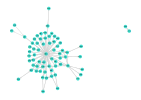

In [6]:
nodelabel_AM = collect(aeropuertos_AM)
gplot(red_AM, nodelabel = nodelabel_AM, arrowlengthfrac = 0.03, NODELABELSIZE = 1.5)

#### Modelo de difusión

Usaremos caminatas aleatorias sobre la red.

Consideraremos:
* Nodo inicial de infección
* No existe backtracking
* Probabilidad $p = 1$ de infección

***Usaremos la función randomwalk de LightGraphs.***

In [7]:
?randomwalk

search: randomwalk non_backtracking_randomwalk



```
randomwalk(g, s, niter; seed=-1)
```

Perform a random walk on graph `g` starting at vertex `s` and continuing for a maximum of `niter` steps. Return a vector of vertices visited in order.


In [ ]:
randomwalk

In [8]:
methods(randomwalk)

# 1 method for generic function "randomwalk":
[1] randomwalk(g::AG, s::Integer, niter::Integer; seed) where {T, AG<:AbstractGraph{T}} in LightGraphs at /Users/yuriko/.julia/packages/LightGraphs/HsNig/src/traversals/randomwalks.jl:8

Escogemos un nodo inicial. En este caso tomaremos $n_0 = 32$, que corresponde al aeropuerto de la Ciudad de México.

In [9]:
findall(x -> x =="MEX", vec(aeropuertos_AM))

1-element Array{Int64,1}:
 32

Calculamos las caminatas aleatorias.

Usaremos los siguientes parámetros:
* $n_0 = 32$
* $100$ iteraciones o pasos
* Semilla $= 1$

In [10]:
rw = randomwalk(red_AM, 32, 100, seed = 1)

100-element Array{Int64,1}:
 32
 61
 32
 52
 32
 61
 32
 21
 32
 33
 32
 19
 32
  ⋮
 60
 10
 60
 10
 60
  2
 53
 32
 60
 39
 32
 63

Creamos una función ***airport_state*** que nos regresará qué aeropuertos fueron infectados y cuáles no. Nos servirá para graficar.

In [11]:
function airport_state(rw)
    states = ones(Int64, 67)
    
    for i in 1:67
        
        f = findfirst(x -> x == i, rw)
     
        if f != nothing
            states[i] = 2
        elseif continue
        end
        
    end
    states
end

airport_state (generic function with 1 method)

In [13]:
state = airport_state(rw)

67-element Array{Int64,1}:
 2
 2
 1
 1
 1
 1
 1
 1
 1
 2
 2
 2
 2
 ⋮
 2
 2
 1
 2
 2
 2
 1
 2
 2
 2
 1
 1

Graficamos.

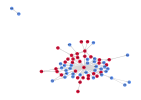

In [14]:
nodecolor = [colorant"cornflowerblue", colorant"crimson"]
nodefillc = nodecolor[state]

gp = gplot(red_AM, nodelabel = nodelabel_AM, arrowlengthfrac = 0.03, NODELABELSIZE = 1.5, nodefillc = nodefillc)


Creamos una función para hacerla interactiva.

In [15]:
function count_inf(rw, steps)
    k = []
    rw = randomwalk(red_AM, 32, 100, seed = 1)
    for i in 1:steps
        count = length(unique(rw[1:i]))
        k = push!(k, count)
    end
    k
end

count_inf (generic function with 1 method)

In [16]:
function state_graph(a0, steps)
    
    walk = randomwalk(red_AM, a0, steps, seed = 1)
  
    inf_state = airport_state(walk)

    count = count_inf(walk, 100)

    
    nodelabel_AM = collect(aeropuertos_AM)
    nodecolor = [colorant"cornflowerblue", colorant"crimson"]
    nodefillc = nodecolor[inf_state]
    inf_gr = gplot(red_AM, nodelabel = nodelabel_AM, arrowlengthfrac = 0.03, NODELABELSIZE = 1.5, nodefillc = nodefillc)
    
end

state_graph (generic function with 1 method)

Graficamos.

In [17]:
@manipulate for i in 1:100
    state_graph(32, i)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>100,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
50, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/yuriko/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/yuriko/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/yuriko/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/yuriko/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/yuriko/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Condition(Any[Task (runnable) @0x000000010ee52890])), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\",\"43\",\"44\",\"45\",\"46\",\"47\",\"48\",\"49\",\"50\",\"51\",\"52\",\"53\",\"54\",\"55\",\"56\",\"57\",\"58\",\"59\",\"60\",\"61\",\"62\",\"63\",\"64\",\"65\",\"66\",\"67\",\"68\",\"69\",\"70\",\"71\",\"72\",\"73\",\"74\",\"75\",\"76\",\"7

In [18]:
function state_graph2(a0, steps)
    
    walk = randomwalk(red_AM, a0, steps, seed = 1)
  
    inf_state = airport_state(walk)

    counts_inf = count_inf(walk, 100)
    count_gr = plot(counts_inf[1:steps], linecolor = "red", legend = false, xlabel = "steps", ylabel = L"\# inf")

    
    nodelabel_AM = collect(aeropuertos_AM)
    nodecolor = [colorant"cornflowerblue", colorant"crimson"]
    nodefillc = nodecolor[inf_state]
    inf_gr = gplot(red_AM, nodelabel = nodelabel_AM, arrowlengthfrac = 0.03, NODELABELSIZE = 1.5, nodefillc = nodefillc)
    
    hbox(inf_gr, count_gr)
    
end

state_graph2 (generic function with 1 method)

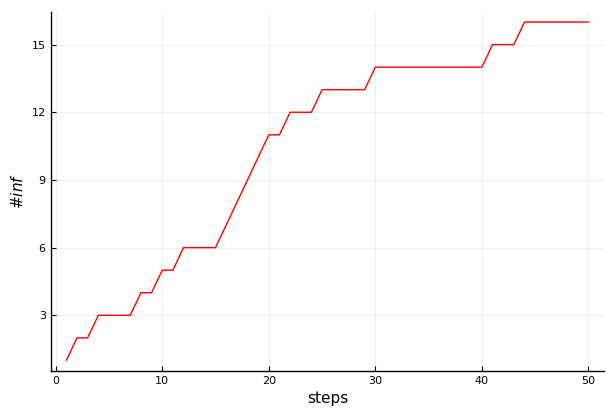

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>100,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
50, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/yuriko/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/yuriko/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/yuriko/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/yuriko/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/yuriko/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Condition(Any[Task (runnable) @0x000000010ee52650])), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\",\"43\",\"44\",\"45\",\"46\",\"47\",\"48\",\"49\",\"50\",\"51\",\"52\",\"53\",\"54\",\"55\",\"56\",\"57\",\"58\",\"59\",\"60\",\"61\",\"62\",\"63\",\"64\",\"65\",\"66\",\"67\",\"68\",\"69\",\"70\",\"71\",\"72\",\"73\",\"74\",\"75\",\"76\",\"7

In [19]:
@manipulate for i in 1:100
    state_graph2(32, i)
end

#### Fin del ejemplo